In [1]:
import graphlab
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

A newer version of GraphLab Create (v1.8.5) is available! Your current version is v1.7.1.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.
[INFO] 1460080243 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to /home/zpgao/anaconda2/lib/python2.7/site-packages/certifi/cacert.pem
1460080243 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to beyond_acm@163.com and will expire on January 04, 2017. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-3046 - Server binary: /home/zpgao/anaconda2/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1460080243.log
[INFO] GraphLab Server Version: 1.7.1


In [2]:
match_best = pd.read_csv('Normal_S2V_Topic/match_best.csv')
match_second = pd.read_csv('Normal_S2V_Topic/match_second.csv')
match_third = pd.read_csv('Normal_S2V_Topic/match_third.csv')

non_match_best = pd.read_csv('Normal_S2V_Topic/non_match_best.csv')
non_match_second = pd.read_csv('Normal_S2V_Topic/non_match_second.csv')
non_match_third = pd.read_csv('Normal_S2V_Topic/non_match_third.csv')

In [3]:
# match_best > match_third 
positive01 = match_best.sub(match_third)
# match_second < match_best
negative01 = match_second.sub(match_best)

# match_second > non_match_best
positive02 = match_second.sub(non_match_best)
# non_match_best < match_thrid
negative02 = non_match_best.sub(match_third)

# match_best > non_match_best
positive03 = match_best.sub(non_match_best)
# non_match_third < match_best
negative03 = non_match_third.sub(match_best)

# match_best > non_match_second
positive04 = match_best.sub(non_match_second)
# non_match_second < match_second
negative04 = non_match_second.sub(match_second)

# match_third > non_match_second
positive05 = match_third.sub(non_match_second)
# non_match_third < match_second
negative05 = non_match_third.sub(match_second)

In [4]:
positive01['flag'] = 1
positive02['flag'] = 1
positive03['flag'] = 1
positive04['flag'] = 1
positive05['flag'] = 1

negative01['flag'] = -1
negative02['flag'] = -1
negative03['flag'] = -1
negative04['flag'] = -1
negative05['flag'] = -1

In [5]:
dataset = pd.concat([positive01, negative01, 
                     positive02, negative02,
                     positive03, negative03, 
                     positive04, negative04,
                     positive05, negative05
                    ], ignore_index=True)

In [6]:
# dataset

In [7]:
dataset = dataset.dropna()

In [8]:
# dataset

In [9]:
dataset.to_csv('Normal_S2V_Topic/raw_data.csv', encoding='utf-8', index = False)

In [10]:
raw_data = graphlab.SFrame.read_csv('Normal_S2V_Topic/raw_data.csv')

PROGRESS: Finished parsing file /home/zpgao/ML/Best_Answer/Model_Building/Normal_S2V_Topic/raw_data.csv
PROGRESS: Parsing completed. Parsed 100 lines in 0.871875 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int]
If parsing fai

In [11]:
train_valid, test = raw_data.random_split(0.9, seed=0.3)
train_valid_shuffled = graphlab.toolkits.cross_validation.shuffle(train_valid, random_seed=0.3)

train_valid.save('Normal_S2V_Topic/Train_valid.csv', format='csv')
test.save('Normal_S2V_Topic/Test.csv', format='csv')

In [12]:
# train_valid

In [13]:
# get all the features
all_features = train_valid_shuffled.column_names()
# need to pop and 'flag' 
print all_features
all_features.pop(-1)
print all_features
all_features
print len(all_features)

['len_answer_content', 'len_user_intro', 'len_question_content', 'user_exp', 'len_user_edu', 'num_user_interst', 'num_user_followed', 'num_question_tags', 'num_user_saved', 'num_user_thanks', 'num_user_agrees', 'num_user_helped', 'num_user_recommend', 'answer_question_overlap', 'question_uinterest_overlap', 'uinterest_answer_overlap', 's2v_0', 's2v_1', 's2v_2', 's2v_3', 's2v_4', 's2v_5', 's2v_6', 's2v_7', 's2v_8', 's2v_9', 's2v_10', 's2v_11', 's2v_12', 's2v_13', 's2v_14', 's2v_15', 's2v_16', 's2v_17', 's2v_18', 's2v_19', 's2v_20', 's2v_21', 's2v_22', 's2v_23', 's2v_24', 's2v_25', 's2v_26', 's2v_27', 's2v_28', 's2v_29', 's2v_30', 's2v_31', 's2v_32', 's2v_33', 's2v_34', 's2v_35', 's2v_36', 's2v_37', 's2v_38', 's2v_39', 's2v_40', 's2v_41', 's2v_42', 's2v_43', 's2v_44', 's2v_45', 's2v_46', 's2v_47', 's2v_48', 's2v_49', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'to

# Selecting L1 penalty via the k cross validation 

In [12]:
n = len(train_valid_shuffled)
k = 10 

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

0 (0, 3000)
1 (3001, 6001)
2 (6002, 9003)
3 (9004, 12004)
4 (12005, 15006)
5 (15007, 18007)
6 (18008, 21008)
7 (21009, 24010)
8 (24011, 27011)
9 (27012, 30013)


After designating one of the k segments as the validation set, we train a model using the rest of the data. To choose the reaminder, we slice (0:start) && (end+1:n) of the data and paste them together. SFrame append() method can pastes together tow disjoint sets of rows originating from a common dataset.

In [13]:
# implement the k-fold-cross-validation 
def k_fold_cross_validation(k, penalty, data, target, features_list):
    sum_validation_accuracy = 0
    n = len(data)
    for i in xrange(k):
        start = (n*i) / k
        end = ( n*(i+1) ) / k
        validation_set = data[start:end+1]
        training_set = data[0:start].append( data[end+1:n] )
        svm_model = graphlab.svm_classifier.create( training_set, 
                                                    target = target, 
                                                    features = features_list,
                                                    penalty = penalty,
                                                    validation_set = None, 
                                                    max_iterations = 20,
                                                    verbose = False)
        results = svm_model.evaluate(validation_set)
        validation_acc = results['accuracy']
        
        sum_validation_accuracy = sum_validation_accuracy + validation_acc
        
    average_validation_accuracy = (sum_validation_accuracy) / k
    return average_validation_accuracy

We can write a loop to find the model that maximizes the average_validation_accuracy
- For penalty in [10^1, 10^1.5, 10^2, 10^2.5, ..., 10^7]
- Run the 10-fold corss-validation with the penalty

In [16]:
average_validation_acc_dict = {}

penalty = 0.1
val_acc = k_fold_cross_validation(10, penalty, train_valid_shuffled, 'flag', all_features)
print 'penalty :' + str(penalty) + ' accuracy:' + str(val_acc) + '\n'
average_validation_acc_dict[penalty] = val_acc

penalty = 0.3
val_acc = k_fold_cross_validation(10, penalty, train_valid_shuffled, 'flag', all_features)
print 'penalty :' + str(penalty) + ' accuracy:' + str(val_acc) + '\n'
average_validation_acc_dict[penalty] = val_acc

penalty = 1.0
val_acc = k_fold_cross_validation(10, penalty, train_valid_shuffled, 'flag', all_features)
print 'penalty :' + str(penalty) + ' accuracy:' + str(val_acc) + '\n'
average_validation_acc_dict[penalty] = val_acc

penalty = 3.3
val_acc = k_fold_cross_validation(10, penalty, train_valid_shuffled, 'flag', all_features)
print 'penalty :' + str(penalty) + ' accuracy:' + str(val_acc) + '\n'
average_validation_acc_dict[penalty] = val_acc

penalty = 10.0
val_acc = k_fold_cross_validation(10, penalty, train_valid_shuffled, 'flag', all_features)
print 'penalty :' + str(penalty) + ' accuracy:' + str(val_acc) + '\n'
average_validation_acc_dict[penalty] = val_acc

penalty = 33.3
val_acc = k_fold_cross_validation(10, penalty, train_valid_shuffled, 'flag', all_features)
print 'penalty :' + str(penalty) + ' accuracy:' + str(val_acc) + '\n'
average_validation_acc_dict[penalty] = val_acc

penalty = 100.0
val_acc = k_fold_cross_validation(10, penalty, train_valid_shuffled, 'flag', all_features)
print 'penalty :' + str(penalty) + ' accuracy:' + str(val_acc) + '\n'
average_validation_acc_dict[penalty] = val_acc

penalty :0.1 accuracy:0.955500894841

penalty :0.3 accuracy:0.955301050271

penalty :1.0 accuracy:0.955534183782

penalty :3.3 accuracy:0.955334317027

penalty :10.0 accuracy:0.955334328119

penalty :33.3 accuracy:0.955334328119

penalty :100.0 accuracy:0.955334328119



{1.0: 0.9555341837820187, 100.0: 0.9553343281191383, 0.1: 0.9555008948413345, 10.0: 0.9553343281191383, 0.3: 0.9553010502710704, 3.3: 0.955334317026522, 33.3: 0.9553343281191383}
+---------+---------------------+
| penalty | validation_accuracy |
+---------+---------------------+
|   1.0   |    0.955534183782   |
|  100.0  |    0.955334328119   |
|   0.1   |    0.955500894841   |
|   10.0  |    0.955334328119   |
|   0.3   |    0.955301050271   |
|   3.3   |    0.955334317027   |
|   33.3  |    0.955334328119   |
+---------+---------------------+
[7 rows x 2 columns]



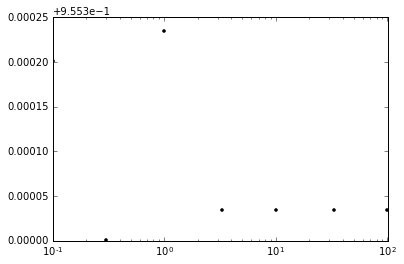

In [17]:
# Plot the penalty in x axis and the cross-validation-accuracy in the y axis
# using plt.xscale('log') will make your plot more intuitive
print average_validation_acc_dict

penalty = graphlab.SArray( average_validation_acc_dict.keys() )
validation_accuracy = graphlab.SArray( average_validation_acc_dict.values() )

sf = graphlab.SFrame({'penalty':penalty,'validation_accuracy':validation_accuracy})
print sf 

plt.plot(sf['penalty'], sf['validation_accuracy'], 'k.')
plt.xscale('log')


In [14]:
final_model = graphlab.svm_classifier.create( train_valid_shuffled, 
                                              target = 'flag', 
                                              features = all_features,
                                              penalty = 1.0,
                                              validation_set = None, 
                                              max_iterations = 100)

PROGRESS: WARNING: Detected extremely low variance for feature(s) 'len_question_content', 'num_question_tags' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.
PROGRESS: SVM:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 30014
PROGRESS: Number of classes           : 2
PROGRESS: Number of feature columns   : 116
PROGRESS: Number of unpacked features : 116
PROGRESS: Number of coefficients    : 117
PROGRESS: Starting L-BFGS
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+-----------+--------------+-------------------+
PROGRESS: | Iteration | Passes   | Step size | Elapsed Time | Training-accuracy |
PROGRESS: +-----------+----------+-----------+--------------+-------------------+
PROGRESS: | 1         | 3        | 0.

In [15]:
final_model.get('coefficients').print_rows(num_rows=100)

+----------------------------+-------+-------+-------------------+
|            name            | index | class |       value       |
+----------------------------+-------+-------+-------------------+
|        (intercept)         |  None |   1   |  -0.204319720723  |
|     len_answer_content     |  None |   1   |   0.428898366775  |
|       len_user_intro       |  None |   1   |   -1.88476941696  |
|    len_question_content    |  None |   1   |        0.0        |
|          user_exp          |  None |   1   |  -0.0621154229861 |
|        len_user_edu        |  None |   1   |  -0.0380260993054 |
|      num_user_interst      |  None |   1   |   -1.65790763059  |
|     num_user_followed      |  None |   1   |   0.070703903979  |
|     num_question_tags      |  None |   1   |        0.0        |
|       num_user_saved       |  None |   1   |   -1.3606192562   |
|      num_user_thanks       |  None |   1   |   0.496945903665  |
|      num_user_agrees       |  None |   1   |   -2.4273950136

In [16]:
results = final_model.evaluate(test)

In [17]:
# test

In [18]:
print results

{'f1_score': 0.962367135880494, 'recall': 0.9654178674351584, 'confusion_matrix': Columns:
	target_label	int
	predicted_label	int
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      -1      |        1        |   71  |
|      -1      |        -1       |  1580 |
|      1       |        -1       |   60  |
|      1       |        1        |  1675 |
+--------------+-----------------+-------+
[4 rows x 3 columns]
, 'precision': 0.9593356242840779, 'accuracy': 0.9613112817483757}


In [19]:
coefficients =  final_model.coefficients['value'].to_numpy()

In [20]:
test0 = pd.read_csv('./Normal_S2V_Topic/test0.csv')
test1 = pd.read_csv('./Normal_S2V_Topic/test1.csv')
test2 = pd.read_csv('./Normal_S2V_Topic/test2.csv')

In [21]:
test0 = test0.fillna(0)
test1 = test1.fillna(0)
test2 = test2.fillna(0)
# test : 3368 x 117
# len(test0)

In [36]:
# test0

In [25]:
from numpy import array
# t0 = array( [1.] + test0.iloc[[0]].values.tolist()[0] )
# t1 = array( [1.] + test0.iloc[[1]].values.tolist()[0] )
# s0 = t0 - t1

In [26]:
# t0.shape

In [27]:
def score(coefficients, answer0, answer1):
    sub = answer0 - answer1
    score = sub.dot(coefficients)
    if score >= 0:
        return 1
    else :
        return -1

In [29]:
import operator
import collections, math
# A_0_score = 0
# print test0.icol[[30]]

def Rank_List( AnswerList ):
    Score_Map = collections.defaultdict(lambda : 0)
    for i in range( len(AnswerList) - 1 ):

        for j in range(i+1, len(AnswerList) ):

            #print (i, j)

            answer_i = array( [1.] + AnswerList.iloc[[i]].values.tolist()[0] )
            answer_j = array( [1.] + AnswerList.iloc[[j]].values.tolist()[0] )

            key_i = 'A_' + str(i) + '_score'
            key_j = 'A_' + str(j) + '_score'

            value_i = 0
            value_j = 0
            value_i += score(coefficients, answer_i, answer_j) 
            value_j -= score(coefficients, answer_i, answer_j)

            Score_Map[key_i] += value_i
            Score_Map[key_j] += value_j
    
    Sorted_scores = sorted(Score_Map.items(), key=operator.itemgetter(1), reverse=True)
    return Sorted_scores
    

In [32]:
# import operator
# sorted_scores = sorted(Score_Map.items(), key=operator.itemgetter(1), reverse=True)

A0_List = Rank_List( test0 )
A1_List = Rank_List( test1 )
A2_List = Rank_List( test2 )

In [31]:
A0_List

[('A_11_score', 29),
 ('A_15_score', 27),
 ('A_13_score', 25),
 ('A_17_score', 23),
 ('A_0_score', 21),
 ('A_8_score', 19),
 ('A_5_score', 17),
 ('A_26_score', 15),
 ('A_27_score', 13),
 ('A_6_score', 11),
 ('A_1_score', 9),
 ('A_9_score', 7),
 ('A_7_score', 5),
 ('A_24_score', 3),
 ('A_23_score', 1),
 ('A_10_score', -1),
 ('A_3_score', -3),
 ('A_12_score', -5),
 ('A_16_score', -7),
 ('A_18_score', -9),
 ('A_22_score', -11),
 ('A_28_score', -13),
 ('A_2_score', -15),
 ('A_29_score', -17),
 ('A_21_score', -19),
 ('A_19_score', -21),
 ('A_14_score', -23),
 ('A_20_score', -25),
 ('A_4_score', -27),
 ('A_25_score', -29)]

In [33]:
A1_List

[('A_7_score', 29),
 ('A_18_score', 27),
 ('A_26_score', 25),
 ('A_0_score', 23),
 ('A_28_score', 21),
 ('A_25_score', 19),
 ('A_19_score', 17),
 ('A_11_score', 15),
 ('A_24_score', 13),
 ('A_1_score', 11),
 ('A_21_score', 9),
 ('A_4_score', 7),
 ('A_29_score', 5),
 ('A_15_score', 3),
 ('A_2_score', 1),
 ('A_14_score', -1),
 ('A_17_score', -3),
 ('A_3_score', -5),
 ('A_9_score', -7),
 ('A_8_score', -9),
 ('A_10_score', -11),
 ('A_13_score', -13),
 ('A_22_score', -15),
 ('A_23_score', -17),
 ('A_16_score', -19),
 ('A_6_score', -21),
 ('A_20_score', -23),
 ('A_5_score', -25),
 ('A_12_score', -27),
 ('A_27_score', -29)]

In [34]:
A2_List

[('A_0_score', 29),
 ('A_13_score', 27),
 ('A_20_score', 25),
 ('A_16_score', 23),
 ('A_10_score', 21),
 ('A_5_score', 19),
 ('A_15_score', 17),
 ('A_28_score', 15),
 ('A_25_score', 13),
 ('A_23_score', 11),
 ('A_18_score', 9),
 ('A_22_score', 7),
 ('A_3_score', 5),
 ('A_6_score', 3),
 ('A_4_score', 1),
 ('A_11_score', -1),
 ('A_26_score', -3),
 ('A_24_score', -5),
 ('A_7_score', -7),
 ('A_21_score', -9),
 ('A_14_score', -11),
 ('A_12_score', -13),
 ('A_17_score', -15),
 ('A_19_score', -17),
 ('A_9_score', -19),
 ('A_8_score', -21),
 ('A_1_score', -23),
 ('A_2_score', -25),
 ('A_27_score', -27),
 ('A_29_score', -29)]